In [1]:
import scipy

In [2]:
scipy.random.randn(10)

array([-0.89031604, -1.45405044, -0.83316593, -1.52087684, -1.36762349,
       -0.21413862, -0.97573224,  0.91056846, -1.32041516,  0.37943921])

In [3]:
import numpy as np
import scipy. stats as stats
import scipy. optimize as opt

In [4]:
rv_unif = stats. uniform. rvs( size=10)

In [5]:
print rv_unif

[ 0.95617486  0.2316226   0.07511569  0.29936983  0.95890546  0.57169365
  0.10131245  0.2550057   0.81651474  0.60701439]


In [6]:
rv_beta = stats. beta. rvs( size=10, a=4, b=2)

In [7]:
print rv_beta

[ 0.70040551  0.61763403  0.42793983  0.36835251  0.94885605  0.47972267
  0.60459506  0.87646834  0.83195364  0.49910702]


In [8]:
import pandas

ImportError: No module named pandas

In [9]:
import pandas

In [11]:
pandas.__version__

u'0.20.2'

In [12]:
import numpy as np

In [13]:
import pandas as ps

In [14]:
from pandas import Series, DataFrame

In [15]:
a = np.random.randn(5)

In [16]:
print a

[ 0.17081923 -0.25696975 -0.79943849  0.57538881 -0.01596302]


In [17]:
s = Series(a)

In [18]:
print s


0    0.170819
1   -0.256970
2   -0.799438
3    0.575389
4   -0.015963
dtype: float64


In [19]:
s = Series(np.random.randn(5),index = ['a','b','c','d','e'])

In [20]:
s

a   -2.116528
b   -0.636188
c   -0.675699
d    2.593994
e   -1.453165
dtype: float64

In [21]:
d = {' a' : 0. , ' b' : 1, ' c' : 2}

In [22]:
s = Series( d)

In [23]:
s

 a    0.0
 b    1.0
 c    2.0
dtype: float64

In [25]:
s = Series( np. random. randn( 3) , index=['a','b','c'])

In [26]:
s[0]

-0.44768672655900754

In [27]:
s[:2]

a   -0.447687
b   -0.698950
dtype: float64

In [28]:
s[[0]]

a   -0.447687
dtype: float64

In [29]:
'a' in s

True

In [31]:
for i in range(1,2):
    print i

1


In [33]:
dates = ps. date_range( ' 20150101' , periods=5)
print dates

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [35]:
df = ps. DataFrame( np. random. randn( 5, 4) , index=dates, columns=list(
'ABCD' ) )

In [36]:
print df

                   A         B         C         D
2015-01-01  0.113090  1.013540  0.753944 -0.014877
2015-01-02  0.286031 -0.251801 -0.341467 -0.105332
2015-01-03 -0.046957  0.927395  0.879098  0.760778
2015-01-04 -0.931946 -2.354245 -0.734621 -1.013156
2015-01-05 -1.696104  0.647399 -1.376002 -1.627310


In [37]:
a = np.random.randint(4)

In [38]:
a

2

In [41]:
df2 = ps.DataFrame({'A':1,'B':ps.Timestamp('20150214'),'C':ps.Series(1.6, index=list(range(4)),dtype='float64'),'D':np.array([4]*4,dtype='int64'),'E':'hello pandas!'})

In [42]:
print df2

   A          B    C  D              E
0  1 2015-02-14  1.6  4  hello pandas!
1  1 2015-02-14  1.6  4  hello pandas!
2  1 2015-02-14  1.6  4  hello pandas!
3  1 2015-02-14  1.6  4  hello pandas!


In [50]:
from math import log,sqrt,exp
from scipy.stats import norm


# 基于Black - Scholes 公式的期权定价公式#
def call_option_pricer(spot, strike, maturity, r, vol):
    d1 = (log(spot/strike)+(r+0.5*vol*vol)*maturity)/vol/sqrt(maturity)
    d2 = d1 - vol * sqrt(maturity)
    price = spot * norm.cdf(d1) - strike * exp(-r*maturity)*norm.cdf(d2)
    return price

spot = 2.45
strike = 2.50
maturity = 0.25
r = 0.05
vol = 0.25
print call_option_pricer(spot, strike, maturity, r, vol)

0.113328713205


In [64]:
import time
import numpy as np
portfolioSize = range(1,10000,500)
timeSpent = []
for size in portfolioSize:
    now = time.time()
    strikes = np.linspace(2.0, 3.0, size)
    for i in range(size):
        res = call_option_pricer( spot, strikes[i] , maturity, r, vol)
    timeSpent.append(time.time() - now)

In [72]:
%matplotlib inline
from matplotlib import pylab
import seaborn as sns

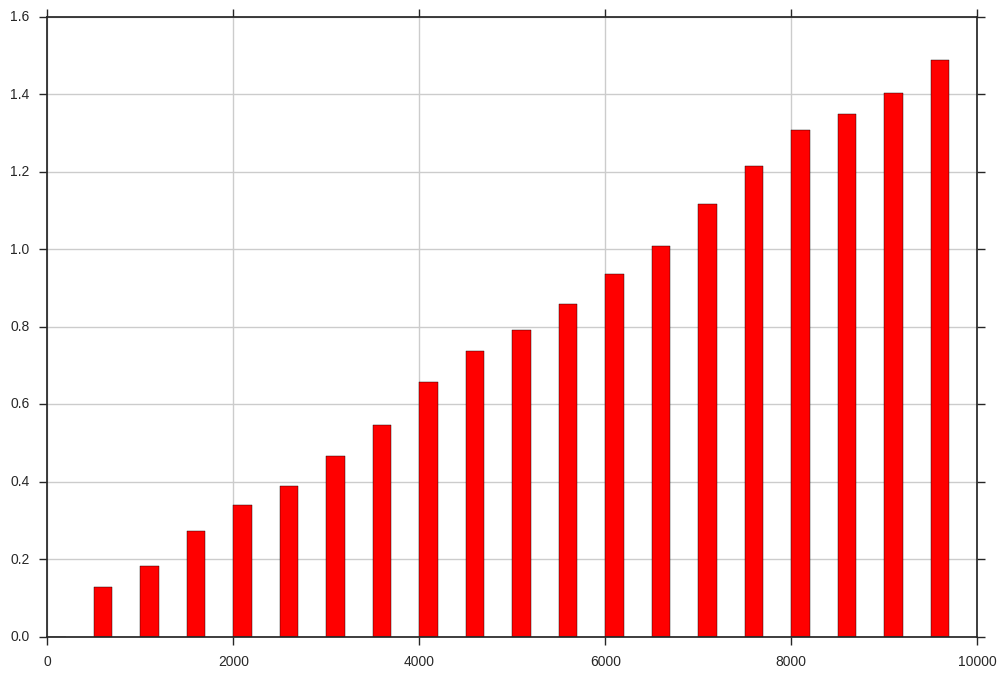

In [75]:
sns.set(style="ticks")
pylab.show()
pylab.figure(figsize = (12,8))
pylab.bar(portfolioSize, timeSpent, color = 'r',width =200)
pylab.grid( True)

In [76]:
#使用numpy能够提升运算效率
def call_option_pricer_numpy(spot, strike, maturity, r, vol):
    d1 = (np.log(spot/strike)+(r+0.5*vol*vol)*maturity)/vol/np.sqrt(maturity)
    d2 = d1-vol*np.sqrt(maturity)
    price = spot * norm.cdf(d1) - strike * np.exp(-r*maturity)*norm.cdf(d2)
    return price

In [77]:
timeSpentNumpy = []
for size in portfolioSize:
    now = time.time()
    strikes = np.linspace(2,3,size)
    res = call_option_pricer_numpy(spot,strikes,maturity,r,vol)
    timeSpentNumpy.append(time.time() - now)

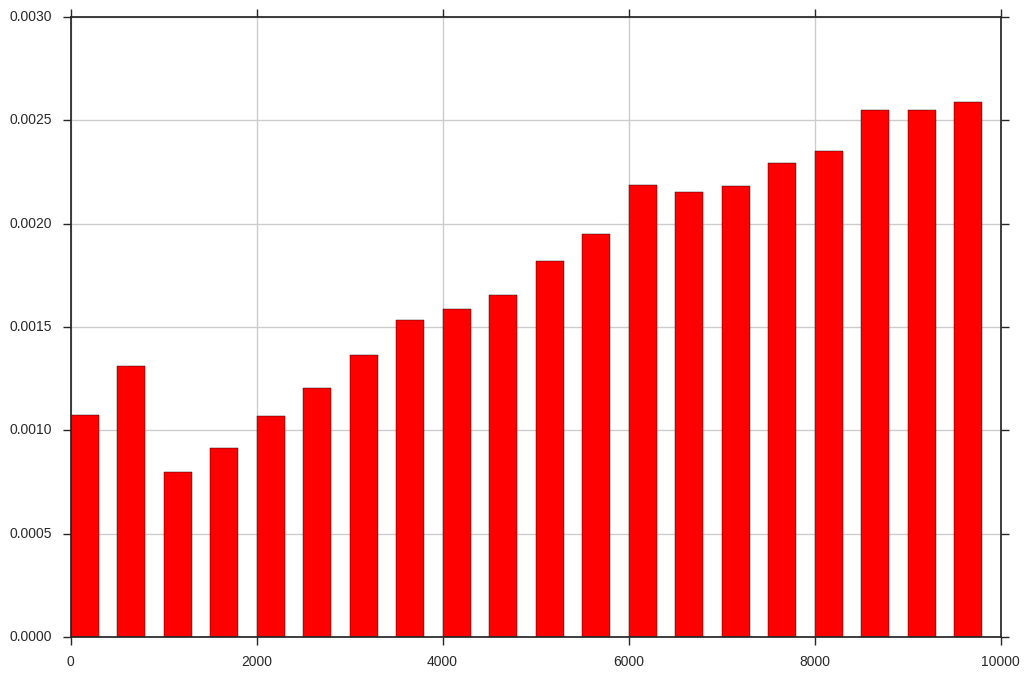

In [80]:
pylab.figure(figsize = (12, 8))
pylab.bar(portfolioSize, timeSpentNumpy, color = 'r' , width = 300)
pylab.grid(True)

In [81]:
from scipy import integrate
dir(integrate)[:5]

['IntegrationWarning', 'Tester', '__all__', '__builtins__', '__doc__']

In [82]:
from scipy import interpolate
dir(interpolate)[:5]

['Akima1DInterpolator',
 'BPoly',
 'BarycentricInterpolator',
 'BivariateSpline',
 'CloughTocher2DInterpolator']

In [83]:
#样条插值
print interpolate.spline.__doc__


    Interpolate a curve at new points using a spline fit

    Parameters
    ----------
    xk, yk : array_like
        The x and y values that define the curve.
    xnew : array_like
        The x values where spline should estimate the y values.
    order : int
        Default is 3.
    kind : string
        One of {'smoothest'}
    conds : Don't know
        Don't know

    Returns
    -------
    spline : ndarray
        An array of y values; the spline evaluated at the positions `xnew`.

    


In [84]:
import numpy as np
from matplotlib import pylab
import seaborn as sns
x = np.linspace(1.0, 13.0, 7)
y = np.sin(x)

In [85]:
pylab.figure()

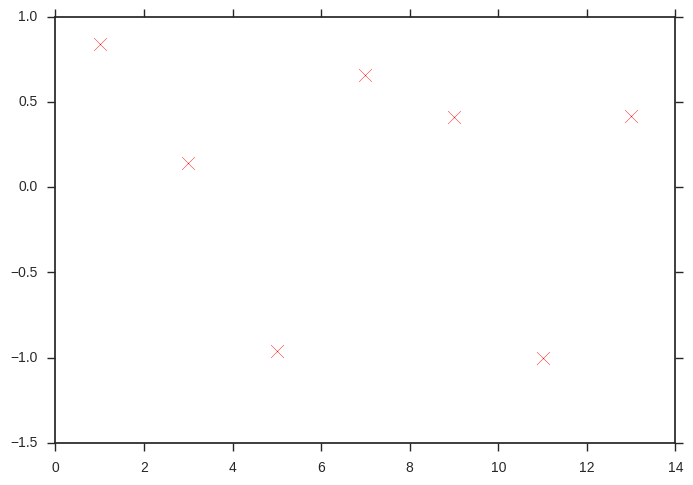

In [86]:
pylab.scatter(x,y,s = 85,marker = 'x',color = 'r')

In [87]:
xnew = np.linspace(1.0,13.0,500)
ynewLinear = interpolate.spline(x,y,xnew,order = 1)
ynewLinear[:5]

array([ 0.84147098,  0.83304993,  0.82462888,  0.81620782,  0.80778677])

In [88]:
ynewLinear = interpolate.spline(x,y,xnew,order = 3)
ynewLinear[:5]

array([ 0.84147098,  0.86598588,  0.88928385,  0.91138025,  0.93229042])

In [89]:
ynewReal = np.sin(xnew)
ynewReal[:5]

array([ 0.84147098,  0.85421967,  0.86647437,  0.87822801,  0.88947378])

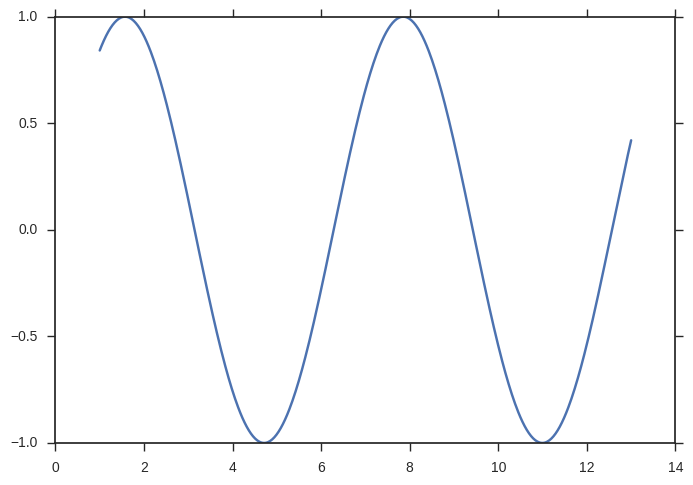

In [90]:
pylab.plot(xnew,ynewReal)

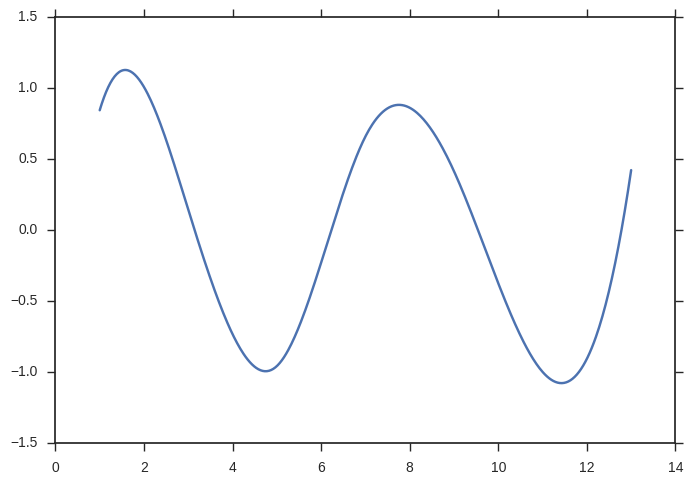

In [91]:
pylab.plot(xnew,ynewLinear)

In [98]:
import pandas as pd
pd.options.display.float_format = '{:,>.2f}'.format

In [109]:

#datas = [Date(2015,3,25),Date(2015,4,25),Date(2015,6,25),Date(2015,9,25)]
strikes = [2.2,2.3,2.4,2.5,2.6]
blockVolMatrix = np.array([[0.32,0.29,0.29,0.27],[0.28,0.29,0.27,0.26],[0.27,0.27,0.26,0.25],[0.27,0.26,0.26,0.25],[0.27,0.25,0.27,0.24]])